# Part 1

# Multivariate Linear Regression

In [130]:
import numpy as np
import matplotlib.pyplot as plt

In [131]:
my_data = np.genfromtxt('housingPriceData.csv', delimiter=',')

In [132]:
my_data = np.delete(my_data,0,0)

In [133]:
my_data = np.delete(my_data,0,1)

In [134]:
my_data

array([[2.21900e+05, 3.00000e+00, 1.00000e+00, 1.18000e+03],
       [5.38000e+05, 3.00000e+00, 2.25000e+00, 2.57000e+03],
       [1.80000e+05, 2.00000e+00, 1.00000e+00, 7.70000e+02],
       ...,
       [4.02101e+05, 2.00000e+00, 7.50000e-01, 1.02000e+03],
       [4.00000e+05, 3.00000e+00, 2.50000e+00, 1.60000e+03],
       [3.25000e+05, 2.00000e+00, 7.50000e-01, 1.02000e+03]])

In [135]:
Y = my_data[:,0]

In [136]:
my_data = np.delete(my_data,0,1)

In [137]:
X = my_data

In [138]:
X

array([[3.00e+00, 1.00e+00, 1.18e+03],
       [3.00e+00, 2.25e+00, 2.57e+03],
       [2.00e+00, 1.00e+00, 7.70e+02],
       ...,
       [2.00e+00, 7.50e-01, 1.02e+03],
       [3.00e+00, 2.50e+00, 1.60e+03],
       [2.00e+00, 7.50e-01, 1.02e+03]])

In [139]:
Y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [140]:
ones = np.ones([X.shape[0],1])
ones

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [141]:
ones.shape

(21613, 1)

In [142]:
X = np.concatenate([ones,X],1)
X

array([[1.00e+00, 3.00e+00, 1.00e+00, 1.18e+03],
       [1.00e+00, 3.00e+00, 2.25e+00, 2.57e+03],
       [1.00e+00, 2.00e+00, 1.00e+00, 7.70e+02],
       ...,
       [1.00e+00, 2.00e+00, 7.50e-01, 1.02e+03],
       [1.00e+00, 3.00e+00, 2.50e+00, 1.60e+03],
       [1.00e+00, 2.00e+00, 7.50e-01, 1.02e+03]])

## Visualising the data

No. of bedrooms

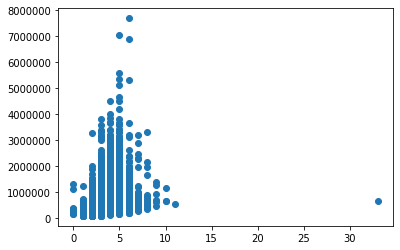

In [143]:
plt.scatter(X[:,1],Y)

No. of bathrooms

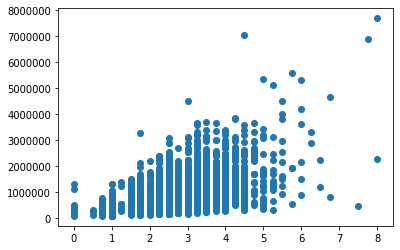

In [144]:
plt.scatter(X[:,2],Y)

Square ft. living area

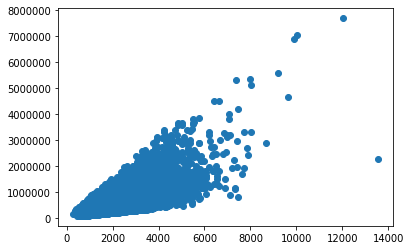

In [145]:
plt.scatter(X[:,3],Y)

In [146]:
alpha = 0.001
iters = 100

# theta is a row vector
theta = np.array([[5.0,5.0,5.0,5.0]])

In [147]:
def computeCost(X,Y,theta):
    inner = (( X @ theta.T) - Y) ** 2
    return np.sum(inner) / ( 2 * len(X))    

In [148]:
Y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [149]:
Y = Y.reshape(-1,1)
Y

array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]])

In [150]:
# Normalisation
Mean = np.sum(X,axis=0)
Mean = Mean.reshape(1,-1)
Mean = Mean/len(X)
X = (X - Mean)/len(X)
Mean
X
Mean_Y = np.sum(Y,axis=0)/len(Y)
Mean_Y
Y = (Y - Mean_Y)/len(Y)

In [151]:
computeCost(X,Y,theta)

141.7485839929009

In [152]:
( X @ theta.T).shape

(21613, 1)

In [153]:
Y.shape
Y

array([[-14.72207198],
       [ -0.09661508],
       [-16.66072002],
       ...,
       [ -6.38445111],
       [ -6.48166112],
       [ -9.95179483]])

In [154]:
def gradientDescent(X,Y,theta,alpha,iters):
    cost = 0
    for i in range(iters):
       theta = theta - alpha* np.sum((X @ theta.T - Y)*X,axis=0).reshape(1,-1)
       cost = computeCost(X, Y, theta)
       plt.scatter(i,cost)
    cost = computeCost(X, Y, theta) 
    return (theta,cost)


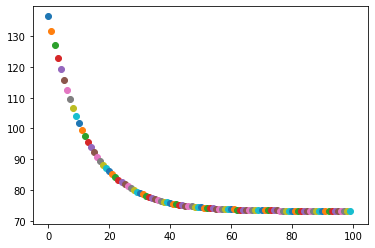

In [155]:
theta,cost = gradientDescent(X,Y,theta,alpha,iters)

In [156]:
theta

array([[  5.        ,   5.00549471,   5.16505366, 275.47199668]])

In [157]:
cost

73.18644334758972

In [158]:
def rmse(X,Y,theta):
    temp = np.sqrt((1/len(X))*np.sum(((X @ theta.T) - Y) ** 2))
    return temp

In [159]:
rmse(X,Y,theta)

12.098466295162352

In [160]:
def r2Score(X,Y,theta):
    mean_y = np.mean(Y)
    
    N = np.sum(((X @ theta.T) - Y) ** 2)
    
    D = np.sum((Y - mean_y) ** 2)
    
    temp = 1 - (N/D)
    
    return temp

In [161]:
r2Score(X,Y,theta)

0.4926849764533813

# Multivariate Polynomial Regression

h β (X) = β 0 + β 1 x 1 + β 2 x 2 + β 3 x 21 + β 4 x 22 + β 5 x 1 x 2

Using only bedrooms and square ft. area i.e. the first and the third column only.

In [162]:
my_data

array([[3.00e+00, 1.00e+00, 1.18e+03],
       [3.00e+00, 2.25e+00, 2.57e+03],
       [2.00e+00, 1.00e+00, 7.70e+02],
       ...,
       [2.00e+00, 7.50e-01, 1.02e+03],
       [3.00e+00, 2.50e+00, 1.60e+03],
       [2.00e+00, 7.50e-01, 1.02e+03]])

In [163]:
my_data2 = np.delete(my_data,1,1)

In [164]:
my_data2

array([[3.00e+00, 1.18e+03],
       [3.00e+00, 2.57e+03],
       [2.00e+00, 7.70e+02],
       ...,
       [2.00e+00, 1.02e+03],
       [3.00e+00, 1.60e+03],
       [2.00e+00, 1.02e+03]])

In [165]:
add_last = np.ones([X.shape[0],3])
add_last

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       ...,
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [166]:
add_start = np.ones([X.shape[0],1])
add_start

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [167]:
my_data2 = np.concatenate([add_start,my_data2],1)
my_data2

array([[1.00e+00, 3.00e+00, 1.18e+03],
       [1.00e+00, 3.00e+00, 2.57e+03],
       [1.00e+00, 2.00e+00, 7.70e+02],
       ...,
       [1.00e+00, 2.00e+00, 1.02e+03],
       [1.00e+00, 3.00e+00, 1.60e+03],
       [1.00e+00, 2.00e+00, 1.02e+03]])

In [168]:
my_data2 = np.concatenate([my_data2,add_last],1)
my_data2

array([[1.00e+00, 3.00e+00, 1.18e+03, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 3.00e+00, 2.57e+03, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 2.00e+00, 7.70e+02, 1.00e+00, 1.00e+00, 1.00e+00],
       ...,
       [1.00e+00, 2.00e+00, 1.02e+03, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 3.00e+00, 1.60e+03, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 2.00e+00, 1.02e+03, 1.00e+00, 1.00e+00, 1.00e+00]])

In [169]:
my_data2[:,3] = my_data2[:,1] ** 2
my_data2[:,4] = my_data2[:,2] ** 2
my_data2[:,5] = my_data2[:,1]*my_data2[:,2]

In [170]:
my_data2

array([[1.0000e+00, 3.0000e+00, 1.1800e+03, 9.0000e+00, 1.3924e+06,
        3.5400e+03],
       [1.0000e+00, 3.0000e+00, 2.5700e+03, 9.0000e+00, 6.6049e+06,
        7.7100e+03],
       [1.0000e+00, 2.0000e+00, 7.7000e+02, 4.0000e+00, 5.9290e+05,
        1.5400e+03],
       ...,
       [1.0000e+00, 2.0000e+00, 1.0200e+03, 4.0000e+00, 1.0404e+06,
        2.0400e+03],
       [1.0000e+00, 3.0000e+00, 1.6000e+03, 9.0000e+00, 2.5600e+06,
        4.8000e+03],
       [1.0000e+00, 2.0000e+00, 1.0200e+03, 4.0000e+00, 1.0404e+06,
        2.0400e+03]])

In [171]:
my_data2.shape

(21613, 6)

In [172]:
Y.shape

(21613, 1)

In [173]:
Y

array([[-14.72207198],
       [ -0.09661508],
       [-16.66072002],
       ...,
       [ -6.38445111],
       [ -6.48166112],
       [ -9.95179483]])

In [174]:
X2 = my_data2

We need to normalise only X as Y is already normalised.

In [ ]:
X2

In [ ]:
Mean = np.sum(X2,axis=0)
Mean = Mean.reshape(1,-1)
Mean = Mean/len(X2)
X2 = (X2 - Mean)/len(X2)

In [ ]:
X2

In [ ]:
alpha = 0.0000000001
iters = 100

# theta is a row vector
theta = np.array([[0.5,0.5,0.5,0.0,0.0,0.0]])

In [ ]:
computeCost(X2,Y,theta)

In [ ]:
theta2, cost2 = gradientDescent(X2,Y,theta,alpha,iters)

In [ ]:
theta2

In [ ]:
cost2

In [ ]:
rmse(X2,Y,theta2)

In [ ]:
r2Score(X2,Y,theta2)

# Part 2

# Regularized Regression

https://towardsdatascience.com/regularization-in-machine-learning-76441ddcf99a

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X,X_test,Y,Y_test = train_test_split(X,Y)

In [ ]:
lamb = 1

In [ ]:
def computeCostReg(X,Y,theta,lamb):
    inner = (( X @ theta.T) - Y) ** 2
    reg = lamb*np.sum(theta**2)
    return (np.sum(inner)+ reg) / ( 2 * len(X)) 

In [ ]:
X.shape

In [ ]:
theta = np.array([0.0,0.0,0.0,0.0])
theta = theta.reshape(1,-1)
theta

In [ ]:
computeCostReg(X,Y,theta,lamb)

In [ ]:
computeCostReg(X_test,Y_test,theta,lamb)

In [ ]:
def gradientDescentReg(X,Y,theta,alpha,iters,lamb):
    cost = 0
    for i in range(iters):
       theta = theta - alpha* np.sum((X @ theta.T - Y)*X,axis=0).reshape(1,-1) + lamb*theta*alpha
       cost = computeCostReg(X, Y, theta, lamb)
       plt.scatter(i,cost)
    cost = computeCostReg(X, Y, theta, lamb) 
    return (theta,cost)

In [ ]:
iters = 1500
alpha = 0.00015

In [ ]:
theta3, cost = gradientDescentReg(X,Y,theta,alpha,iters,lamb)

In [ ]:
computeCostReg(X_test,Y_test,theta,lamb)

In [ ]:
cost

In [ ]:
rmse(X,Y,theta3)

In [ ]:
r2Score(X,Y,theta3)

# LASSO

In [ ]:
def gradientDescentLasso(X,Y,theta,alpha,iters,lamb):
    cost = 0
    for i in range(iters):
       theta = theta - alpha* np.sum((X @ theta.T - Y)*X,axis=0).reshape(1,-1) + lamb*alpha
       cost = computeCostReg(X, Y, theta, lamb)
       plt.scatter(i,cost)
    cost = computeCostReg(X, Y, theta, lamb) 
    return (theta,cost)

In [ ]:
def computeCostLasso(X,Y,theta,lamb):
    inner = (( X @ theta.T) - Y) ** 2
    reg = lamb*np.sum(np.absolute(theta))
    return (np.sum(inner)+ reg) / ( 2 * len(X)) 

In [ ]:
theta = np.array([0.0,0.0,0.0,0.0])
theta = theta.reshape(1,-1)

In [ ]:
lamb = 5
iters = 1000
alpha = 0.0001

In [ ]:
computeCostLasso(X,Y,theta,lamb)

In [ ]:
computeCostLasso(X_test,Y_test,theta,lamb)

In [ ]:
theta4,cost = gradientDescentLasso(X,Y,theta,alpha,iters,lamb)

In [ ]:
theta4

In [ ]:
cost

In [ ]:
computeCostLasso(X_test,Y_test,theta,lamb)

In [ ]:
rmse(X,Y,theta4)

In [ ]:
r2Score(X,Y,theta4)